# Migraine Prediction Using Machine Learning

In this notebook, the target is to classify the type of migraine (a type of headache), given a set of features that are extracted from patient's medical records.

In [1]:
#Importing Libraries
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import plot_confusion_matrix, precision_score, recall_score, f1_score

# Data Loading

The first step is to load dataset into memory.

In [2]:
df = pd.read_csv("data.csv")

In [3]:
df.shape

(400, 24)

# EDA (Explorarory Data Analysis)

In [4]:
df.columns

Index(['Age', 'Duration', 'Frequency', 'Location', 'Character', 'Intensity',
       'Nausea', 'Vomit', 'Phonophobia', 'Photophobia', 'Visual', 'Sensory',
       'Dysphasia', 'Dysarthria', 'Vertigo', 'Tinnitus', 'Hypoacusis',
       'Diplopia', 'Defect', 'Ataxia', 'Conscience', 'Paresthesia', 'DPF',
       'Type'],
      dtype='object')

In [5]:
df.Age.min(), df.Age.max()

(15, 77)

<AxesSubplot:title={'center':'Patient age'}>

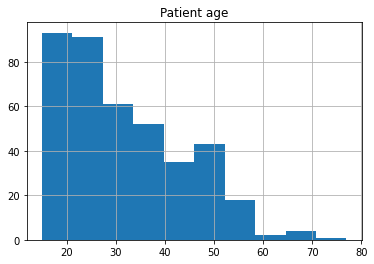

In [6]:
plt.title("Patient age")
df['Age'].hist()

In [7]:
df.Character.value_counts()

1    369
0     20
2     11
Name: Character, dtype: int64

<AxesSubplot:xlabel='Character', ylabel='count'>

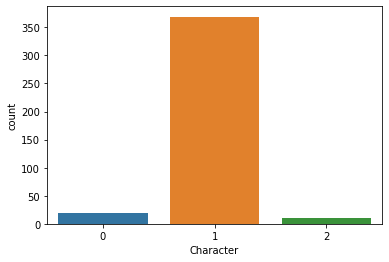

In [8]:
sns.countplot(x=df['Character'])

<AxesSubplot:xlabel='Defect', ylabel='count'>

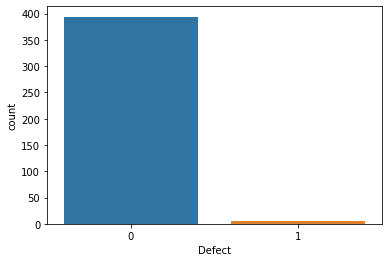

In [9]:
sns.countplot(x=df.Defect)

In [10]:
df.Type.value_counts()

Typical aura with migraine       247
Migraine without aura             60
Familial hemiplegic migraine      24
Typical aura without migraine     20
Basilar-type aura                 18
Other                             17
Sporadic hemiplegic migraine      14
Name: Type, dtype: int64

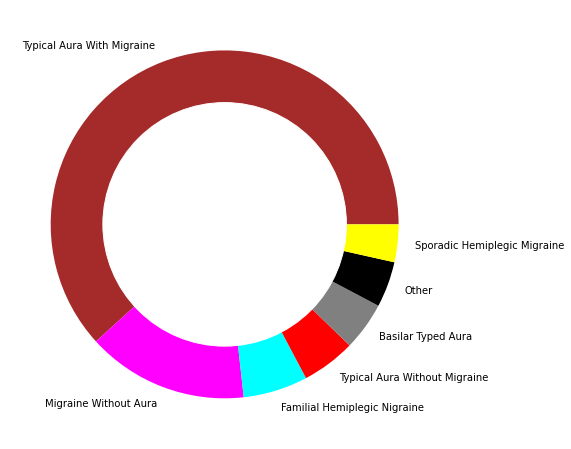

In [11]:
plt.figure(figsize=(10, 8))
circle = plt.Circle((0, 0), 0.7, color='white')
plt.pie(df.Type.value_counts(), labels=['Typical Aura With Migraine', 'Migraine Without Aura', 'Familial Hemiplegic Nigraine',
                                                'Typical Aura Without Migraine', 'Basilar Typed Aura', 
                                         'Other', 'Sporadic Hemiplegic Migraine'], colors=['brown', 'magenta', 'cyan', 
                                                                                   'red', 'grey', 'black', 'yellow'])
p = plt.gcf()
p.gca().add_artist(circle)

From the figure, it can be seen that.The most common type of migraine in the dataset is Typical Aura With Migraine
Migraine Wtihout Aura holds the second position with second most common place
Other 5 types of heartbeats in the dataset are less frequent as compared to the first two

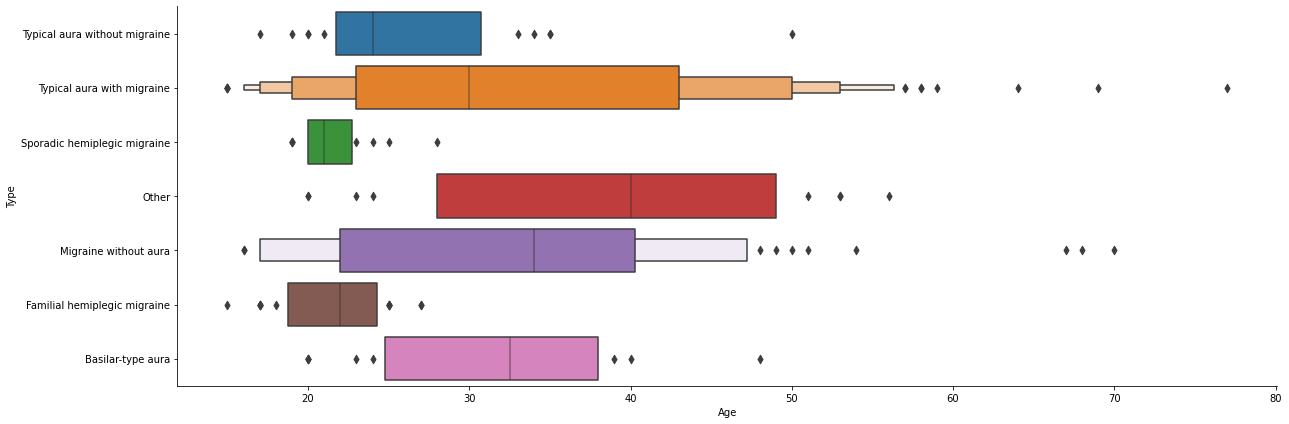

In [12]:
sns.catplot(y='Type', x='Age', data=df.sort_values("Type", ascending=False),
           kind='boxen', height=6, aspect=3)

In [13]:
df.isnull().sum().to_numpy()

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

# Sampling Data

We have unequal number of samples in each class of dataset, which means that we are dealing with imbalanced classification. We need to resample the dataset in order to make a machine learning model that learns all instances well. For this, we'll apply random oversampling & undersampling techniques.

For undergoing this procedure, we'll follow following steps:

First, we extract the features of each class from dataset
Then, we apply sampling to each of the classes by assigning equal number of instances to each class
Then we concatenate each of the dataframes in a single dataframe that contains equal samples of each class


In [14]:
# as there are 7 classes, so there will be 7 different dataframes
data_1 = df[df['Type'] == 'Typical aura with migraine']
data_2 = df[df['Type'] == 'Migraine without aura']
data_3 = df[df['Type'] == 'Familial hemiplegic migraine']
data_4 = df[df['Type'] == 'Typical aura without migraine']
data_5 = df[df['Type'] == 'Basilar-type aura']
data_6 = df[df['Type'] == 'Other']
data_7 = df[df['Type'] == 'Sporadic hemiplegic migraine']

In [15]:
df.shape

(400, 24)

In [16]:
400/7

57.142857142857146

In [17]:
from sklearn.utils import resample

data_1_resample = resample(data_1, n_samples=200, 
                           random_state=123, replace=True)
data_2_resample = resample(data_2, n_samples=200, 
                           random_state=123, replace=True)
data_3_resample = resample(data_3, n_samples=200, 
                           random_state=123, replace=True)
data_4_resample = resample(data_4, n_samples=200, 
                           random_state=123, replace=True)
data_5_resample = resample(data_5, n_samples=200, 
                           random_state=123, replace=True)
data_6_resample = resample(data_6, n_samples=200, 
                           random_state=123, replace=True)
data_7_resample = resample(data_7, n_samples=200, 
                           random_state=123, replace=True)

In [18]:
train_dataset = pd.concat([data_1, data_2_resample, data_3_resample, data_4_resample, 
                          data_5_resample, data_6_resample, data_7_resample])

In [19]:
train_dataset.head(5)

,Age,Duration,Frequency,Location,Character,Intensity,Nausea,Vomit,Phonophobia,Photophobia,...,Vertigo,Tinnitus,Hypoacusis,Diplopia,Defect,Ataxia,Conscience,Paresthesia,DPF,Type
0,30,1,5,1,1,2,1,0,1,1,...,0,0,0,0,0,0,0,0,0,Typical aura with migraine
1,50,3,5,1,1,3,1,1,1,1,...,1,0,0,0,0,0,0,0,0,Typical aura with migraine
2,53,2,1,1,1,2,1,1,1,1,...,0,0,0,0,0,0,0,0,0,Typical aura with migraine
3,45,3,5,1,1,3,1,0,1,1,...,1,0,0,0,0,0,0,0,0,Typical aura with migraine
4,53,1,1,1,1,2,1,0,1,1,...,0,0,0,0,0,0,0,0,1,Typical aura with migraine


In [20]:
train_dataset.shape

(1447, 24)

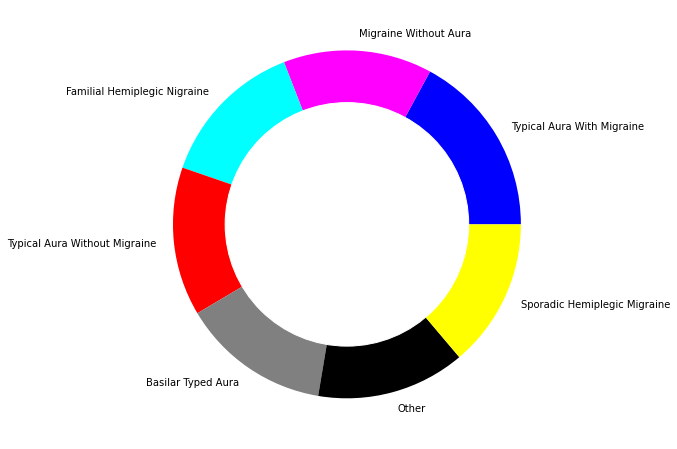

In [21]:
# viewing the sample distribution of classes again

plt.figure(figsize=(10, 8))
circle = plt.Circle((0, 0), 0.7, color='white')
plt.pie(train_dataset.Type.value_counts(), labels=['Typical Aura With Migraine', 'Migraine Without Aura', 'Familial Hemiplegic Nigraine',
                                                'Typical Aura Without Migraine', 'Basilar Typed Aura', 
                                         'Other', 'Sporadic Hemiplegic Migraine'], colors=['blue', 'magenta', 'cyan', 
                                                                                   'red', 'grey', 'black', 'yellow'])
p = plt.gcf()
p.gca().add_artist(circle)

After undergoing the re-sampling step, we have now arrived at a point where we have equal number of samples of each class.

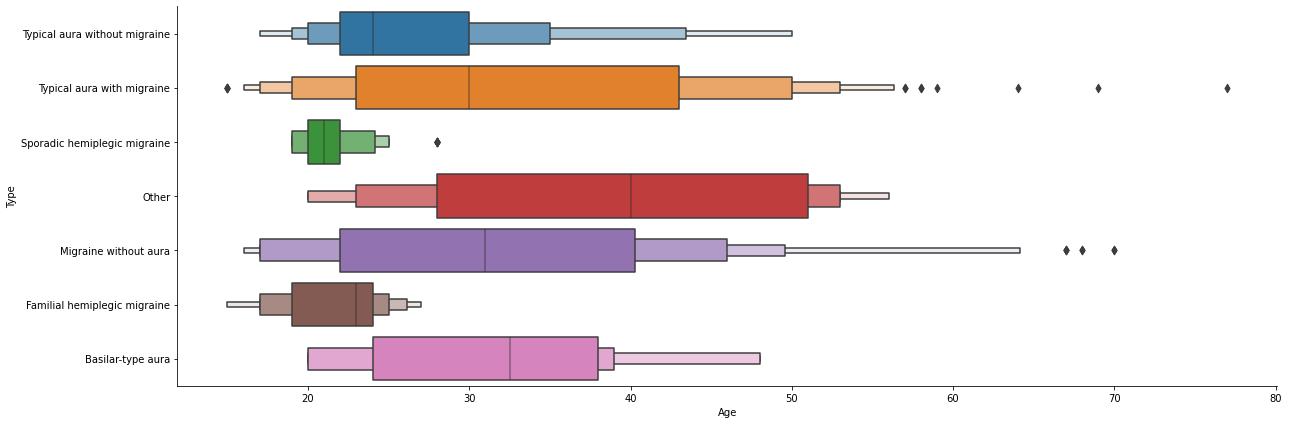

In [22]:
sns.catplot(y='Type', x='Age', data=train_dataset.sort_values("Type", ascending=False),
           kind='boxen', height=6, aspect=3)


# Selecting X & Y Variables

In [23]:
X = train_dataset.drop('Type', axis=1)
Y = train_dataset['Type']

In [24]:
X.shape, Y.shape

((1447, 23), (1447,))

In [25]:
X.head(5)

,Age,Duration,Frequency,Location,Character,Intensity,Nausea,Vomit,Phonophobia,Photophobia,...,Dysarthria,Vertigo,Tinnitus,Hypoacusis,Diplopia,Defect,Ataxia,Conscience,Paresthesia,DPF
0,30,1,5,1,1,2,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,50,3,5,1,1,3,1,1,1,1,...,0,1,0,0,0,0,0,0,0,0
2,53,2,1,1,1,2,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,45,3,5,1,1,3,1,0,1,1,...,0,1,0,0,0,0,0,0,0,0
4,53,1,1,1,1,2,1,0,1,1,...,0,0,0,0,0,0,0,0,0,1


In [26]:
Y.head(5)

0    Typical aura with migraine
1    Typical aura with migraine
2    Typical aura with migraine
3    Typical aura with migraine
4    Typical aura with migraine
Name: Type, dtype: object

# Data Splicing (Split into Train & Test Sets)

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X, 
                                                  Y, 
                                                  test_size=0.2, 
                                                  random_state=123)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(1157, 23)
(290, 23)
(1157,)
(290,)


# Applying Machine Learning Models

In [28]:
# initialize random forest
rf = RandomForestClassifier()
# fit the model
rf.fit(X_train, Y_train)

RandomForestClassifier()

In [29]:
# initialize voting classifier 
dt = DecisionTreeClassifier()
# fit the model
dt.fit(X_train, Y_train)

DecisionTreeClassifier()

In [30]:
rf.get_params(deep=True)

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [31]:
# get some predictions on test set
y_hat = rf.predict(X_test)

In [32]:
y_hat[:6]

array(['Typical aura with migraine', 'Typical aura without migraine',
       'Other', 'Other', 'Basilar-type aura',
       'Typical aura with migraine'], dtype=object)

In [33]:
print('Accuracy of Random Forest on training dataset: %.5f' % rf.score(X_train, Y_train))
print('Accuracy of Random Forest on test dataset: %.2f' % rf.score(X_test, Y_test))

Accuracy of Random Forest on training dataset: 1.00000
Accuracy of Random Forest on test dataset: 0.98


After fitting our classifier on training dataset and testing on test dataset, we have achieved an accuracy of 99.9% on training data & 98% on test dataset.

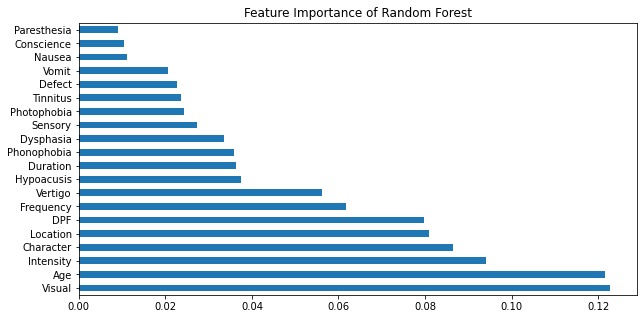

In [34]:
plt.figure(figsize=(10, 5))
plt.title('Feature Importance of Random Forest')
imp = pd.Series(rf.feature_importances_, index=X.columns)
imp.nlargest(20).plot(kind='barh')
plt.show()

In [35]:
def get_scores(clf):
    model = clf.fit(X_train, Y_train)
    y_pred = clf.predict(X_test)
    
    print('============================================================================')
    print('Classification Results of Classification Model After Training')
    print('============================================================================')
    print('')
    
    print('Accuracy of Classifier on training dataset: %.3f' % rf.score(X_train, Y_train))
    print('Accuracy of Classifier on test dataset: %.2f' % rf.score(X_test, Y_test))
    print('Precision of classifier: %.3f' % precision_score(Y_test, y_pred, average='weighted'))
    print('Recall of classifer: %.3f' % recall_score(Y_test, y_pred, average='weighted'))
    print('F1 score of classifer: %.3f' % f1_score(Y_test, y_pred, average='weighted'))

In [36]:
get_scores(rf)

Classification Results of Classification Model After Training

Accuracy of Classifier on training dataset: 1.000
Accuracy of Classifier on test dataset: 0.98
Precision of classifier: 0.984
Recall of classifer: 0.983
F1 score of classifer: 0.983


In [37]:
get_scores(dt)

Classification Results of Classification Model After Training

Accuracy of Classifier on training dataset: 1.000
Accuracy of Classifier on test dataset: 0.98
Precision of classifier: 0.974
Recall of classifer: 0.969
F1 score of classifer: 0.969


In [38]:
# calculate confusion matrix of random forest
confusion_matrix(Y_test, y_hat)

array([[47,  0,  0,  0,  0,  0,  0],
       [ 0, 31,  0,  0,  0,  0,  0],
       [ 0,  0, 40,  0,  0,  0,  0],
       [ 0,  0,  0, 41,  0,  0,  0],
       [ 0,  0,  0,  0, 36,  0,  0],
       [ 0,  3,  1,  0,  1, 47,  0],
       [ 0,  0,  0,  0,  0,  0, 43]], dtype=int64)

In [39]:
df = pd.DataFrame({'Actual Labels': Y_test, 'Predicted Labels': y_hat})
df.head(10)

,Actual Labels,Predicted Labels
280,Typical aura with migraine,Typical aura with migraine
364,Typical aura without migraine,Typical aura without migraine
251,Other,Other
384,Other,Other
396,Basilar-type aura,Basilar-type aura
238,Typical aura with migraine,Typical aura with migraine
208,Typical aura with migraine,Typical aura with migraine
65,Typical aura with migraine,Typical aura with migraine
78,Typical aura with migraine,Typical aura with migraine
239,Typical aura with migraine,Migraine without aura


Text(33.0, 0.5, 'Actual Labels')

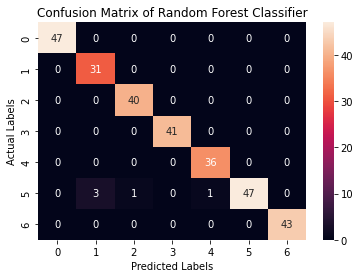

<Figure size 720x504 with 0 Axes>

In [40]:
cm = confusion_matrix(Y_test, y_hat)
# tn, fp, fn, tp = cm.ravel()
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax=ax)
plt.figure(figsize = (10, 7))
ax.set_title('Confusion Matrix of Random Forest Classifier')
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('Actual Labels')